# **CHECKPOINT 02 (Parte 01): Modelos com Redes Neurais com Keras**

## Disciplina:  Disruptive Architectures: IOT, IOB e GENERATIVE AI

## Turmas: 2TDSP (2o semestre de 2024)

## Professor: André Tritiack

## Pontuação Máxima: 4.00 pontos

## INSIRA NESSA CÉLULA O NOME E O RM DOS INTEGRANTES DO GRUPO









# **Introdução**

Durante o semestre, estudamos o uso de algoritmos de **Aprendizado de Máquina Supervisionado**.

- Regressão Logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

- Naive Bayes

https://scikit-learn.org/stable/modules/naive_bayes.html

- Máquina de Vetor Suporte (SVM)

https://scikit-learn.org/stable/modules/svm.html#classification

- Árvore de Decisão (Decision Tree)

https://scikit-learn.org/stable/modules/tree.html

- Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Cada uma dessas técnicas tem uma forte base matemática e conceitual. Os algoritmos foram propostos ao longo de diversas décadas e possuem diferentes cenários de aplicações.

Nos exercícios a seguir, você e seu grupo receberão conjuntos de dados e precisarão aplicar duas dessas técnicas em cada exercício, utilizando como métrica a acurácia.

Em seguida, utilizando a biblioteca Keras, crie modelos de Redes Neurais para classificação e compare os resultados.

Altere o número de neurônios, a quantidade de camadas e as funções de ativação para comparar os resultados.

Use o exemplo demonstrado em aula para criar sua solução.

Importante: Somente serão aceitos arquivos .ipynb comentados, com justificativas e conclusões sobre as implementações

------------------
## <font color='red'> Atenção</fonte>:

A seguir são apresentados dois datasets de pessoas reais.

Ao se trabalhar com dados de pessoas devemos considerar a origem e os preceitos **bioéticos** envolvidos em sua coleta, construção e utilização.

Além disso, é boa prática que os dados estejam anonimizados.

----------------------
# **QUESTÃO 01**

## **Diagnóstico médico: Problemas Ortopédicos na Coluna Vertebral**

Esse dataset contém dados sobre problemas ortopédicos na coluna vertebral, diagnosticados no Centre Médico-Chirurgical de Réadaptation des Massues, em Lyon, France. Contém 6 atributos biomecânicos para 310 entradas anonimizadas, sendo 100 de pacientes considerados sem problemas (Normal - NO), 60 de pacientes com Hérnia de Disco (Disk Hernia - DH) e 150 de pacientes com Espondilolistese (Spondylolisthesis - SL).

O dataset foi disponibilizado em um arquivo .csv, em anexo da tarefa.

Maiores informações disponíveis em https://www.openml.org/d/1523

PEDRO HENRIQUE SOARES ARAUJO RM553801 Beatriz Silva rm552600


## Parte 1: Importação de bibliotecas

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#bibliotecas para a analise exploratoria e implantação dos modelos de ML e rede neural

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Parte 2: Importação dos dados e Análise Exploratória


In [4]:
df = pd.read_csv('/content/questao_01.csv')

In [19]:
df.shape

(310, 8)

In [20]:
df.describe()

,Unnamed: 0,V1,V2,V3,V4,V5,V6
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,154.500000,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,89.633513,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,0.000000,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,77.250000,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,154.500000,58.691038,16.357689,49.562398,42.404912,118.268178,11.767933
75%,231.750000,72.877696,22.120395,63.000000,52.695889,125.467675,41.287352
max,309.000000,129.834041,49.431864,125.742386,121.429566,163.071041,418.543082


In [18]:
df.sample(5)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,diagnostic
211,211,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
56,56,43.349606,7.467469,28.065483,35.882137,112.776187,5.753277,Disk Hernia
83,83,81.104100,24.794168,77.887020,56.309932,151.839857,65.214616,Spondylolisthesis
87,87,44.914149,10.218996,44.630914,34.695154,130.075660,37.364540,Spondylolisthesis
153,153,57.286945,15.149350,64.000000,42.137595,116.735387,30.341203,Spondylolisthesis


In [6]:
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,diagnostic
0,0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Disk Hernia
1,1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Disk Hernia
2,2,68.832021,22.218482,50.092194,46.613539,105.985136,-3.530317,Disk Hernia
3,3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Disk Hernia
4,4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Disk Hernia


# Parte 3: Pré Processamento




In [21]:
df.dropna(inplace=True)

In [22]:
# Separação das features e do target
X = df.drop(columns=["Unnamed: 0", "diagnostic"])  # Removendo o índice e a coluna alvo
y = df['diagnostic']

# Parte 4: Criação das variáveis com os dados de entrada (X) e dados de saída (y) e separação de dados de treinamento e teste.

In [23]:

# Divisão dos dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parte 5.1: Criação do primeiro modelo, utilizando o primeiro algoritmo.






In [16]:

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Aplicando Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Previsão e avaliação
y_pred_log = log_reg.predict(X_test)
print("Acurácia da Regressão Logística:", accuracy_score(y_test, y_pred_log))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_log))


# Parte 5.2: Criação do segundo modelo, utilizando o segundo algoritmo.



In [24]:
# Aplicando Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

In [25]:
# Previsão e avaliação
y_pred_rf = rf_model.predict(X_test)
print("Acurácia do Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))

Acurácia do Random Forest: 0.8064516129032258
Relatório de Classificação:
                    precision    recall  f1-score   support

      Disk Hernia       0.50      0.50      0.50        12
           Normal       0.71      0.67      0.69        18
Spondylolisthesis       0.97      1.00      0.98        32

         accuracy                           0.81        62
        macro avg       0.73      0.72      0.72        62
     weighted avg       0.80      0.81      0.80        62



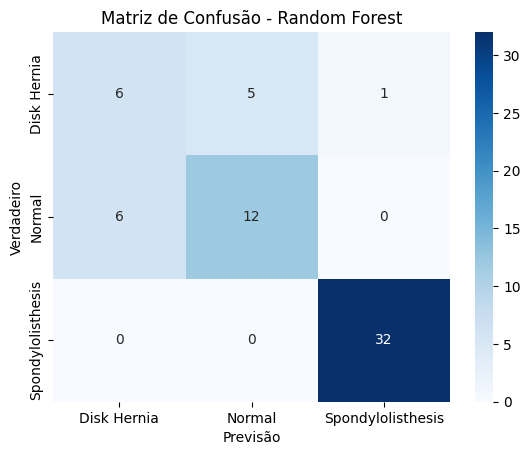

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Random Forest')
plt.show()


# Parte 5.3: Criação da arquitetura e treinamento do modelo de Redes Neurais com Keras

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
# Criando o modelo de rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Primeira camada oculta
model.add(Dense(32, activation='relu'))  # Segunda camada oculta
model.add(Dense(3, activation='softmax'))  # Camada de saída (3 classes)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
y_train_keras = pd.get_dummies(y_train)  # One-hot encoding da variável target
y_test_keras = pd.get_dummies(y_test)    # One-hot encoding da variável target
model.fit(X_train, y_train_keras, epochs=50, batch_size=10, validation_data=(X_test, y_test_keras))

In [30]:
# Avaliando o modelo
scores = model.evaluate(X_test, y_test_keras)
print(f"Acurácia da Rede Neural: {scores[1]*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8192 - loss: 0.4375 
Acurácia da Rede Neural: 82.26%


# Parte 6: Comparação das métricas dos modelos (utilize somente a acurácia nesse exemplo)

In [31]:
# Previsão e avaliação(random forest)
y_pred_rf = rf_model.predict(X_test)
print("Acurácia do Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))

Acurácia do Random Forest: 0.8064516129032258
Relatório de Classificação:
                    precision    recall  f1-score   support

      Disk Hernia       0.50      0.50      0.50        12
           Normal       0.71      0.67      0.69        18
Spondylolisthesis       0.97      1.00      0.98        32

         accuracy                           0.81        62
        macro avg       0.73      0.72      0.72        62
     weighted avg       0.80      0.81      0.80        62



In [32]:
# Previsão e avaliação (regressao )
y_pred_log = log_reg.predict(X_test)
print("Acurácia da Regressão Logística:", accuracy_score(y_test, y_pred_log))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_log))

Acurácia da Regressão Logística: 0.7741935483870968
Relatório de Classificação:
                    precision    recall  f1-score   support

      Disk Hernia       0.00      0.00      0.00        12
           Normal       0.59      0.89      0.71        18
Spondylolisthesis       0.91      1.00      0.96        32

         accuracy                           0.77        62
        macro avg       0.50      0.63      0.56        62
     weighted avg       0.64      0.77      0.70        62



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_

In [33]:
# Avaliando o modelo(rede neural)
scores = model.evaluate(X_test, y_test_keras)
print(f"Acurácia da Rede Neural: {scores[1]*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8192 - loss: 0.4375 
Acurácia da Rede Neural: 82.26%


Com isso podemos analisar que os valores dados pelos modelos de Ml(random forest e regressão linear) ficaram com 77 e e 80

----------------------
# **QUESTÃO 02**

## **Diagnóstico médico: Diabetes no povo Pima**

Esse dataset contém dados sobre incidência de diabetes em mulheres do Povo Pima (índios nativos norte americanos originários do atual Estado do Arizona). Contém 8 atributos biomédicos para 768 entradas anonimizadas, sendo 500 testados negativo para diabetes e 268 testados positivo para diabetes.

Faça o download do dataset:

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [34]:
# Carregamento do dataset
file_path = '/content/diabetes.csv'  # Substitua pelo caminho correto do arquivo
df = pd.read_csv(file_path)

# Exibindo as primeiras 5 linhas do dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
# Resumo estatístico dos dados
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
# Distribuição da variável alvo
df['Outcome'].value_counts()


,count
Outcome,
0,500
1,268


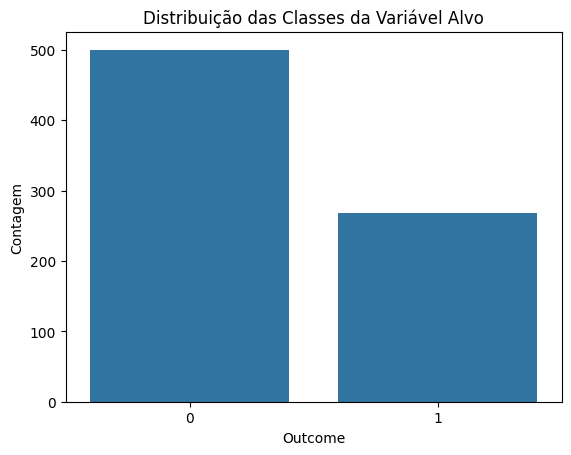

In [37]:
# Visualizando a distribuição da variável alvo
sns.countplot(x='Outcome', data=df)
plt.title('Distribuição das Classes da Variável Alvo')
plt.xlabel('Outcome')
plt.ylabel('Contagem')
plt.show()


In [38]:
# Substituindo zeros por NaN para colunas onde zero não faz sentido
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Verificando valores faltantes
df.isnull().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [39]:
from sklearn.impute import SimpleImputer

# Inicializando o imputador com a estratégia da mediana
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Imputando os valores faltantes
df[cols_with_zero] = imputer.fit_transform(df[cols_with_zero])

# Verificando novamente se há valores faltantes
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


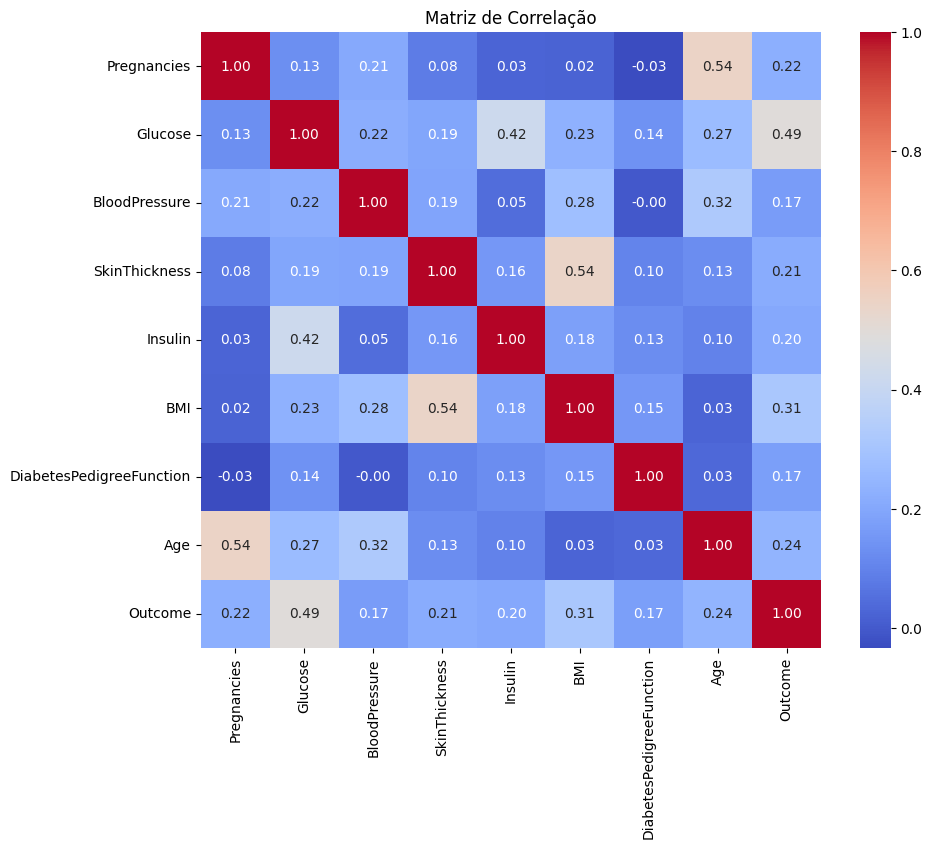

In [40]:
# Calculando a matriz de correlação
correlation_matrix = df.corr()

# Plotando a matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()


In [41]:
# Separando as features (X) e a variável alvo (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando o StandardScaler
scaler = StandardScaler()

# Ajustando o scaler nos dados de treino e transformando tanto treino quanto teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificando as dimensões dos conjuntos
print("Shape de X_train_scaled:", X_train_scaled.shape)
print("Shape de X_test_scaled:", X_test_scaled.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)


Shape de X_train_scaled: (614, 8)
Shape de X_test_scaled: (154, 8)
Shape de y_train: (614,)
Shape de y_test: (154,)


In [42]:
# Inicializando e treinando o modelo de Regressão Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred_log = log_reg.predict(X_test_scaled)

# Avaliando o modelo
print("Acurácia da Regressão Logística:", accuracy_score(y_test, y_pred_log))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_log))


Acurácia da Regressão Logística: 0.7532467532467533
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [43]:
# Inicializando e treinando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test_scaled)

# Avaliando o modelo
print("Acurácia do Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_rf))


Acurácia do Random Forest: 0.7337662337662337
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [44]:
# One-hot encoding da variável alvo para redes neurais
y_train_keras = to_categorical(y_train)
y_test_keras = to_categorical(y_test)

# Criando o modelo de rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Primeira camada oculta
model.add(Dense(32, activation='relu'))  # Segunda camada oculta
model.add(Dense(2, activation='softmax'))  # Camada de saída (2 classes)

# Compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train_scaled, y_train_keras, epochs=100, batch_size=16, validation_data=(X_test_scaled, y_test_keras), verbose=1)

# Avaliando o modelo
scores = model.evaluate(X_test_scaled, y_test_keras, verbose=0)
print(f"Acurácia da Rede Neural: {scores[1]*100:.2f}%")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6837 - loss: 0.6122 - val_accuracy: 0.7273 - val_loss: 0.5459
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7845 - loss: 0.4608 - val_accuracy: 0.7597 - val_loss: 0.5132
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7601 - loss: 0.4650 - val_accuracy: 0.7597 - val_loss: 0.5097
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7428 - loss: 0.4727 - val_accuracy: 0.7532 - val_loss: 0.5145
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8363 - loss: 0.3919 - val_accuracy: 0.7597 - val_loss: 0.5141
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8045 - loss: 0.4057 - val_accuracy: 0.7468 - val_loss: 0.5192
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8166 - loss: 0.3902 - val_accuracy: 0.7468 - val_loss: 0.5183
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8027 - loss: 0.4020 - val_accuracy: 0.7532 - val_loss: 0

In [49]:
import pandas as pd

# Coletando as acurácias dos modelos
accuracy_df = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'Random Forest', 'Rede Neural'],
    'Acurácia': [accuracy_log, accuracy_rf, accuracy_nn]
})

# Exibindo a comparação
print(accuracy_df)



                Modelo  Acurácia
0  Regressão Logística  0.753247
1        Random Forest  0.733766
2          Rede Neural  0.707792


Esses resultados mostram que a Regressão Logística obteve o melhor desempenho, com uma acurácia de 75,32%, seguida pela Random Forest (73,38%) e a Rede Neural (70,78%). Para melhorar os resultados da Rede Neural.